In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import tensorflow as tf
import tensorflow_probability as tfp

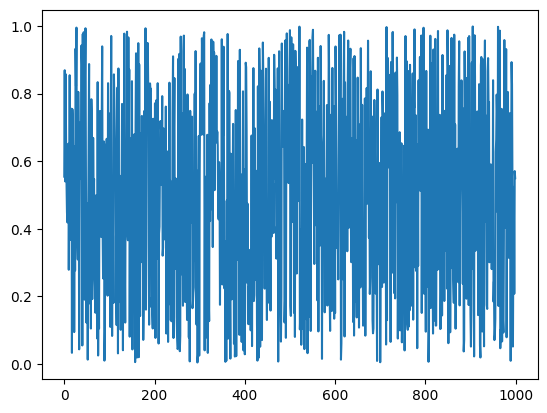

In [7]:
n = 50
p = 20
s = np.random.default_rng().uniform(0,1, n*p)
X = np.reshape(s,(-1, p))
X.shape
df = pd.DataFrame(X)
#  we let r=25
r= 2
y = np.zeros(n) #initialising y array
for i in range(n):
    yTemp = df.iloc[i,0:r].sum() + np.random.normal(0, 1) #generating y values from a simple linear model with gaussian noise
    y[i] = yTemp

plt.plot(s)

sigma1 = 1
sigma2 = 0.1
sigmay = 0.1
gamma = 0.1
rho = 1

In [8]:
def compNormal_include(theta_i, gamma, sigma1, sigma2):
    return (gamma * sigma2 * np.exp(-((theta_i**2)/(2*(sigma1**2)))))

def compNormal_exclude(theta_i, gamma, sigma1, sigma2):
    return ((sigma1-(gamma*sigma1)) * np.exp(-((theta_i**2)/(2*(sigma2**2)))))

def compNormal_data(theta, y, X, sigmay):
    ssum = 0
    for j in range(len(X)):
        ssum += ((y[j] - np.matmul(X[j], theta))**2)/(2*(sigmay**2))
    return ssum

def ssp(theta, gamma, sigma1, sigma2):
    ssum = 0
    for i in range(len(X[1])):
        ssum += np.log(compNormal_include(theta[i], gamma, sigma1, sigma2) + compNormal_exclude(theta[i], gamma, sigma1, sigma2))
        # print(np.log(compNormal_include(theta[i], gamma, sigma1, sigma2) + compNormal_exclude(theta[i], gamma, sigma1, sigma2)))
    return ssum

In [143]:
p = len(X[1])
n = len(X)
b = p + n
t = 1
niter = 100000
sigma_theta = 0.1
no_accept = 0
theta_0 = np.array([np.zeros(p)]).T                                   #initialising theta as zero vectors
for i in range(r): theta_0[i] = 1
thetas = theta_0.T[0]

while t < niter:
    t += 1
    #symmetric random walk
    theta_c = np.reshape(np.random.multivariate_normal(np.zeros(p), np.identity(p)*sigma_theta), (-1, 1))
    log_joint_candidate = ssp(theta_c, gamma, sigma1, sigma2) - compNormal_data(theta_c, y, X, sigmay)
    log_joint_old = ssp(theta_0, gamma, sigma1, sigma2) - compNormal_data(theta_0, y, X, sigmay)
    mhr = np.exp(log_joint_candidate - log_joint_old)[0]
    U = np.random.uniform()
    if U <= np.minimum(mhr, 1):
        theta_0 = theta_c
        thetas = np.vstack((thetas, theta_c.T[0]))
        no_accept += 1
        print("%sth acceptance" % str(no_accept))
    else:
        thetas = np.vstack((thetas, theta_0.T[0]))
        # print(thetas)
    # theta_0 = np.vstack(theta0, )

print(no_accept)
print(thetas[-1])

3
[ 0.38625833  0.56132788  0.03521026 -0.06345807  0.3256423   0.20994979
  0.40170623  0.19608742 -0.14722677  0.37060266 -0.01938105  0.13803178
 -0.10764246  0.18203604  0.44054256 -0.15406967  0.30760503  0.53377985
  0.41679081  0.11795706  0.35663802  0.24035707 -0.02665242  0.03558332
 -0.24871855  0.20372075 -0.25713168 -0.51858703  0.3021472  -0.14274788
  0.7200054  -0.01515298 -0.04593795 -0.78823055  0.327009    0.137091
 -0.03089725  0.18078988  0.47636842 -0.00675954  0.00653909 -0.12087982
  0.23412504 -0.07641631  0.22685177 -0.00826552  0.11307793  0.0145467
 -0.02192157  0.66748428]


In [15]:
def metroHastings(sigma1, sigma2, sigmay, X, y, niter = 1000):
    p = len(X[1])
    n = len(X)
    b = p + n
    t = 1
    sigma_theta = 1
    no_accept = 0
    theta_0 = np.array([np.zeros(p)]).T                                   #initialising theta as zero vectors
    # for i in range(r): theta_0[i] = 1
    thetas = theta_0.T[0]

    while t < niter:
        t += 1
        #symmetric random walk
        theta_c = np.reshape(np.random.multivariate_normal(np.zeros(p), np.identity(p)*sigma_theta), (-1, 1))
        log_joint_candidate = ssp(theta_c, gamma, sigma1, sigma2) - compNormal_data(theta_c, y, X, sigmay)
        log_joint_old = ssp(theta_0, gamma, sigma1, sigma2) - compNormal_data(theta_0, y, X, sigmay)
        mhr = np.exp(log_joint_candidate - log_joint_old)[0]
        U = np.random.uniform()
        if U <= np.minimum(mhr, 1):
            theta_0 = theta_c
            thetas = np.vstack((thetas, theta_c.T[0]))
            no_accept += 1
        else:
            thetas = np.vstack((thetas, theta_0.T[0]))
            # print(thetas)
    
    print("%s accepted" % str(no_accept))
    return thetas

samples = metroHastings(sigma1 = 1, sigma2 = 0.1, sigmay = 0.1, X = X, y = y, niter = 1000)

C:\Users\Johnny Lee\AppData\Local\Temp\ipykernel_8800\1680408149.py:18: RuntimeWarning: overflow encountered in exp
  mhr = np.exp(log_joint_candidate - log_joint_old)[0]


5 accepted


tf.Tensor(
[ 0.28401092 -0.3910349   0.7561281  -0.10863849  0.07737585  0.6141246
  0.8935572   0.2363262   0.25695822 -0.381161    0.31838933  0.8426728
  0.29273158 -0.30976698 -0.03738435 -0.20946582  0.20215425  1.2508897
 -0.56009114 -0.3373113   0.88171995 -0.11783797 -0.36958775 -0.49339777
  0.41222638  0.47531965 -0.1810534   0.44646952 -0.07669695 -0.17056167
 -0.31933188 -0.00648851  0.27138484 -0.42458043  0.36556515 -0.16981083
  0.4176067   0.91970056 -0.79405504  0.57009876 -0.17238112 -0.62011963
 -0.32075915 -0.31780237  0.5937554  -0.08328455  0.39786956  0.7343357
 -0.12586312 -0.11227042], shape=(50,), dtype=float32)


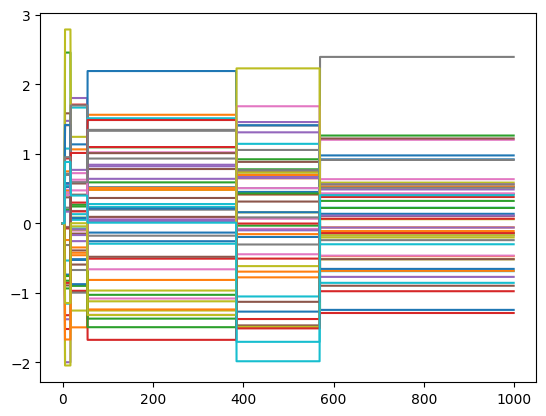

In [21]:
trace = tf.convert_to_tensor(samples, dtype = tf.float32)
plt.plot(trace)
mean, variance = tf.nn.moments(trace, axes=0)
print(mean)